
yˆ=w0+w1x

UTN - Ordenada en el origen (W0):  9.052358747325695
UTN - Vector de coeficientes de la función lineal (W1):  0.6086898287857334
UTN - Valor para Predecir (X):  8
UTN - y= 9.052358747325695 + 0.6086898287857334 * 8 = 13.921877377611562
UTN - Para x= 8, y= 13.921877377611562
UTN - Forma Simple de Predecir: [13.92187738]

CGPT - Ordenada en el origen (W0):  0.674694765863654
CGPT - Vector de coeficientes de la función lineal (W1):  1.9480222449784523
CGPT - Valor para Predecir (X):  8
CGPT - y= 0.674694765863654 + 1.9480222449784523 * 8 = 16.258872725691273
CGPT - Para x= 8, y= 16.258872725691273
CGPT - Forma Simple de Predecir: [16.25887273]



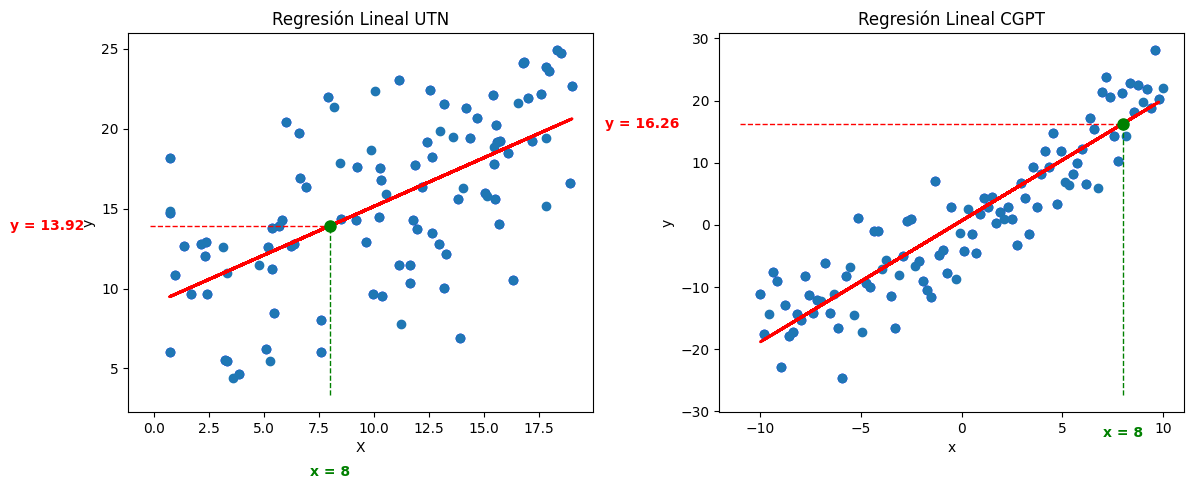

In [1]:
%matplotlib inline       
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import scipy.stats as stats
from sklearn import metrics

# **********************************
# UTN
x_lim_min = 0
x_lim_max = 20
muestras = 100
np.random.seed(20)
x = np.random.uniform(x_lim_min, x_lim_max, muestras)
X_utn = x[:, np.newaxis]

# Ecuación de la Recta yˆ=w0+w1∗x
b = 10
a = 0.5
mu = 0
sigma = 4
y_utn = b + a * x + np.random.normal(mu, sigma, size=len(x))

# CHATGPT
np.random.seed(0)
X_cgpt = np.linspace(-10, 10, muestras).reshape(-1, 1)
y_cgpt = 2*X_cgpt + np.random.randn(100, 1) * 5

# Covertir a Lista
y_cgpt = np.squeeze(y_cgpt)


# Grilla de 2 celdas horizontales
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primero Agrego las Muestras
axes[0].plot(X_utn, y_utn, 'o');
axes[1].plot(X_cgpt, y_cgpt, 'o');

# **********************************
X_train_utn, X_test_utn, y_train_utn, y_test_utn = train_test_split(X_utn, y_utn, test_size=0.20, random_state=311)
X_train_cgpt, X_test_cgpt, y_train_cgpt, y_test_cgpt = train_test_split(X_cgpt, y_cgpt, test_size=0.20, random_state=311)

regressor_utn = LinearRegression()
regressor_cgpt = LinearRegression()

regressor_utn.fit(X_train_utn, y_train_utn)
regressor_cgpt.fit(X_train_cgpt, y_train_cgpt)

x_predecir = 8
y_utn = regressor_utn.intercept_ + regressor_utn.coef_ * x_predecir
y_cgpt = regressor_cgpt.intercept_ + regressor_cgpt.coef_ * x_predecir

print('')
print('yˆ=w0+w1x')
print('')
print('UTN - Ordenada en el origen (W0): ', regressor_utn.intercept_.item())
print('UTN - Vector de coeficientes de la función lineal (W1): ', regressor_utn.coef_.item())
print('UTN - Valor para Predecir (X): ' , x_predecir)
print('UTN - y= ' + str(regressor_utn.intercept_) + ' + ' + str(regressor_utn.coef_.item()) + ' * ' + str(x_predecir) + ' = ' + str(y_utn.item()))
print('UTN - Para x= ' + str(x_predecir) +  ', y= ' + str(y_utn.item()))
print('UTN - Forma Simple de Predecir: ' + str(regressor_utn.predict([[x_predecir]]))) 
print('')
print('CGPT - Ordenada en el origen (W0): ', regressor_cgpt.intercept_)
print('CGPT - Vector de coeficientes de la función lineal (W1): ', regressor_cgpt.coef_.item())
print('CGPT - Valor para Predecir (X): ' , x_predecir)
print('CGPT - y= ' + str(regressor_cgpt.intercept_) + ' + ' + str(regressor_cgpt.coef_.item()) + ' * ' + str(x_predecir) + ' = ' + str(y_cgpt.item()))
print('CGPT - Para x= ' + str(x_predecir) +  ', y= ' + str(y_cgpt.item()))
print('CGPT - Forma Simple de Predecir: ' + str(regressor_cgpt.predict([[x_predecir]]))) 
print('')

x_value = x_predecir
# Subplot a la izquierda
axes[0].scatter(X_train_utn, y_train_utn, color='blue', label='Datos de entrenamiento')
axes[0].plot(X_train_utn, regressor_utn.predict(X_train_utn), color='red', linewidth=2, label='Modelo de regresión')
axes[0].scatter(x_predecir, y_utn, color='green', label='Valor a predecir')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].set_title('Regresión Lineal UTN')
y_value1 = regressor_utn.predict([[x_predecir]])
y_value1 = round(y_value1.item(),2)
axes[0].plot([x_value, x_value], [axes[0].get_ylim()[0], y_value1], 'g--', linewidth=1)
axes[0].plot([axes[0].get_xlim()[0], x_value], [y_value1, y_value1], 'r--', linewidth=1)
axes[0].plot(x_value, y_value1, 'go', markersize=8)
axes[0].text(x_value, axes[0].get_ylim()[0] - 4, f'x = {x_value}', ha='center', weight='bold',  color='green')
axes[0].text(axes[0].get_xlim()[0] - 2, y_value1, f'y = {y_value1}', ha='right', va='center', weight='bold', color='red')

# Subplot a la derecha
axes[1].scatter(X_train_cgpt, y_train_cgpt, color='blue', label='Datos de entrenamiento')
axes[1].plot(X_train_cgpt, regressor_cgpt.predict(X_train_cgpt), color='red', linewidth=2, label='Modelo de regresión')
axes[1].scatter(x_predecir, y_cgpt, color='green', label='Valor a predecir')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Regresión Lineal CGPT')
y_value2 = regressor_cgpt.predict([[x_predecir]])
y_value2 = round(y_value2.item(),2)
axes[1].plot([x_value, x_value], [axes[1].get_ylim()[0], y_value2], 'g--', linewidth=1)
axes[1].plot([axes[1].get_xlim()[0], x_value], [y_value2, y_value2], 'r--', linewidth=1)
axes[1].plot(x_value, y_value2, 'go', markersize=8)
axes[1].text(x_value, axes[1].get_ylim()[0] - 4, f'x = {x_value}', ha='center', weight='bold',  color='green')
axes[1].text(axes[1].get_xlim()[0] - 2, y_value2, f'y = {y_value2}', ha='right', va='center', weight='bold', color='red')

# Ajustar el espaciado entre los subplots
fig.tight_layout()

# Mostrar la figura con los subplots
plt.show()


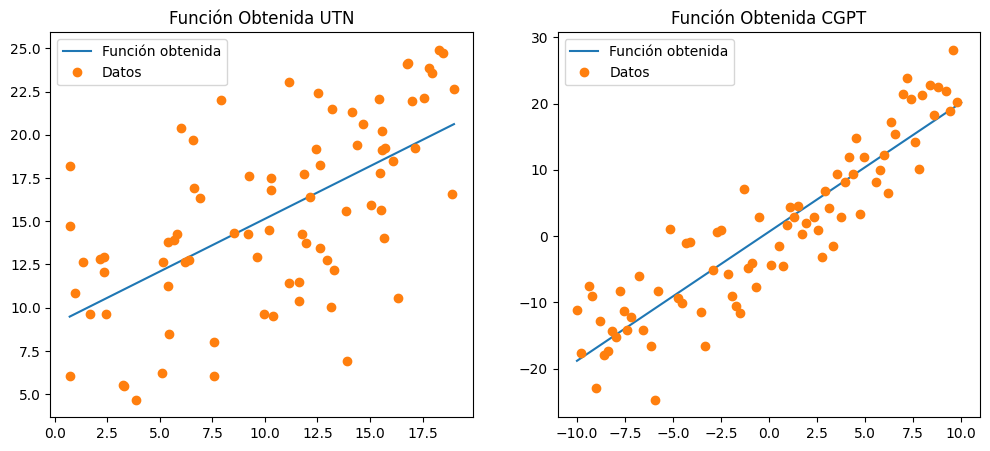

In [2]:
#Vamos a graficar la función obtenida, junto con los puntos de entrenamiento:

# Grilla de 2 celdas horizontales
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

xlin_utn = np.linspace(X_utn.min(), X_utn.max(), 200)
ylin_utn = regressor_utn.coef_[0] * xlin_utn + regressor_utn.intercept_

xlin_cgpt = np.linspace(X_cgpt.min(), X_cgpt.max(), 200)
ylin_cgpt = regressor_cgpt.coef_[0] * xlin_cgpt + regressor_cgpt.intercept_

axes[0].plot(xlin_utn, ylin_utn, label='Función obtenida')      #Recta
axes[0].plot(X_train_utn, y_train_utn, 'o', label="Datos");     #Puntos
axes[0].set_title('Función Obtenida UTN')
axes[0].legend(loc='best')

axes[1].plot(xlin_cgpt, ylin_cgpt, label='Función obtenida')      #Recta
axes[1].plot(X_train_cgpt, y_train_cgpt, 'o', label="Datos");     #Puntos
axes[1].set_title('Función Obtenida CGPT')
axes[1].legend(loc='best')


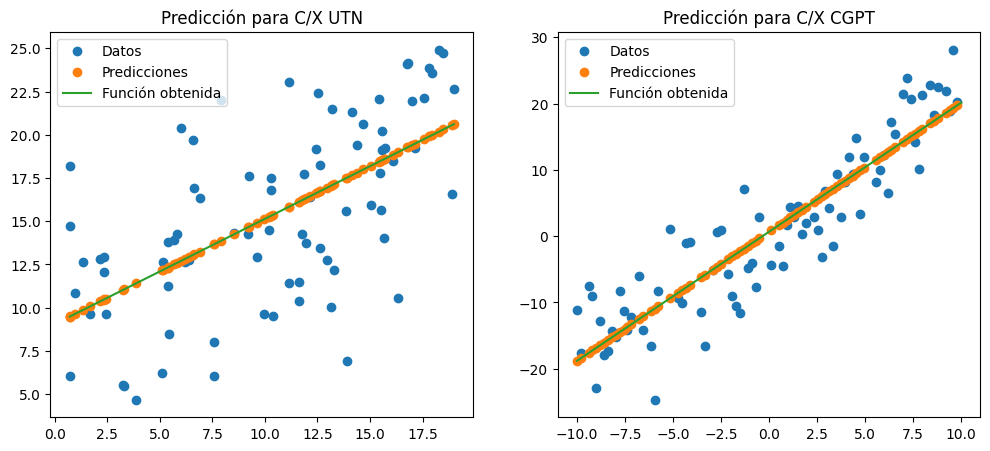

In [3]:
#Podemos calcular la predicción para cada valor de  x de entrenamiento.

# Grilla de 2 celdas horizontales
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

y_pred_train_utn = regressor_utn.predict(X_train_utn)

axes[0].plot(X_train_utn, y_train_utn, 'o', label="Datos")
axes[0].plot(X_train_utn, y_pred_train_utn, 'o', label="Predicciones")
axes[0].plot(xlin_utn, ylin_utn, label='Función obtenida')
axes[0].set_title('Predicción para C/X UTN')
axes[0].legend(loc='best')

y_pred_train_cgpt = regressor_cgpt.predict(X_train_cgpt)

axes[1].plot(X_train_cgpt, y_train_cgpt, 'o', label="Datos")
axes[1].plot(X_train_cgpt, y_pred_train_cgpt, 'o', label="Predicciones")
axes[1].plot(xlin_cgpt, ylin_cgpt, label='Función obtenida')
axes[1].set_title('Predicción para C/X CGPT')
axes[1].legend(loc='best')


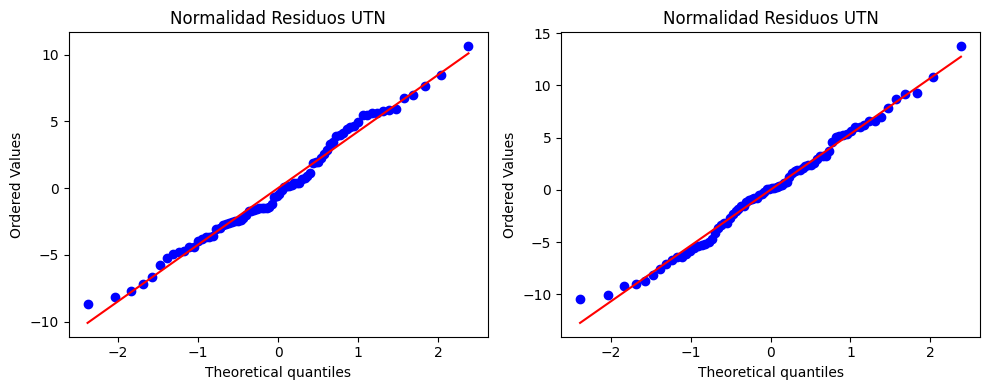

In [4]:

# qqPlot, evalua la normalidad de los datos (En este caso, de los residuos)

residuals_utn = y_pred_train_utn - y_train_utn
residuals_cgpt = y_pred_train_cgpt - y_train_cgpt

data1 = residuals_utn
data2 = residuals_cgpt

# Crear la figura y los subplots en una grilla horizontal
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico 1 - probplot de datos normales
stats.probplot(data1, plot=axs[0])
axs[0].set_title('Normalidad Residuos UTN')

# Gráfico 2 - probplot de datos uniformes
stats.probplot(data2, plot=axs[1])
axs[1].set_title('Normalidad Residuos UTN')

# Ajustar el espaciado entre los subplots
fig.tight_layout()

# Mostrar la figura con los subplots
plt.show()


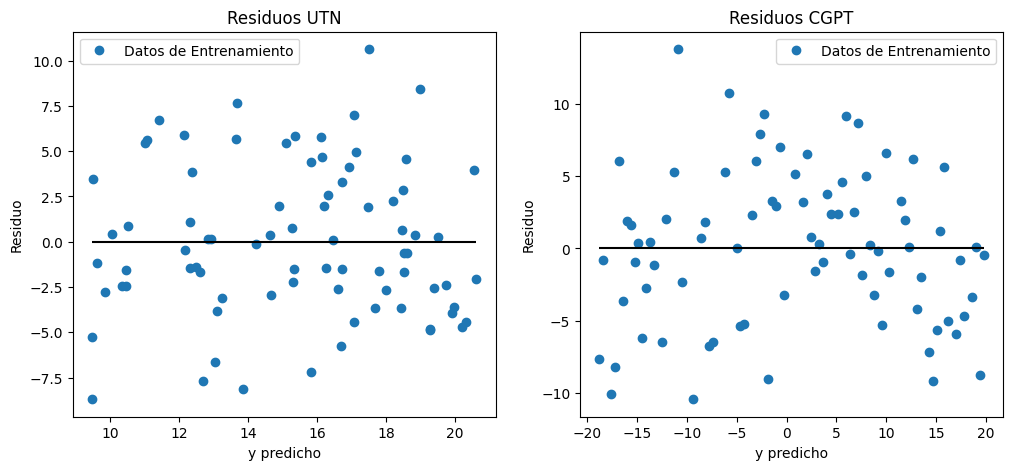

In [5]:
# Grafico de Residuos

# Grilla de 2 celdas horizontales
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(y_pred_train_utn, residuals_utn, 'o', label="Datos de Entrenamiento")
axes[0].hlines(y = 0, xmin = min(y_pred_train_utn), xmax = max(y_pred_train_utn), color = 'black')
axes[0].set_title('Residuos UTN')
axes[0].set_xlabel('y predicho')
axes[0].set_ylabel('Residuo')
axes[0].legend(loc='best')

axes[1].plot(y_pred_train_cgpt, residuals_cgpt, 'o', label="Datos de Entrenamiento")
axes[1].hlines(y = 0, xmin = min(y_pred_train_cgpt), xmax = max(y_pred_train_cgpt), color = 'black')
axes[1].set_title('Residuos CGPT')
axes[1].set_xlabel('y predicho')
axes[1].set_ylabel('Residuo')
axes[1].legend(loc='best')


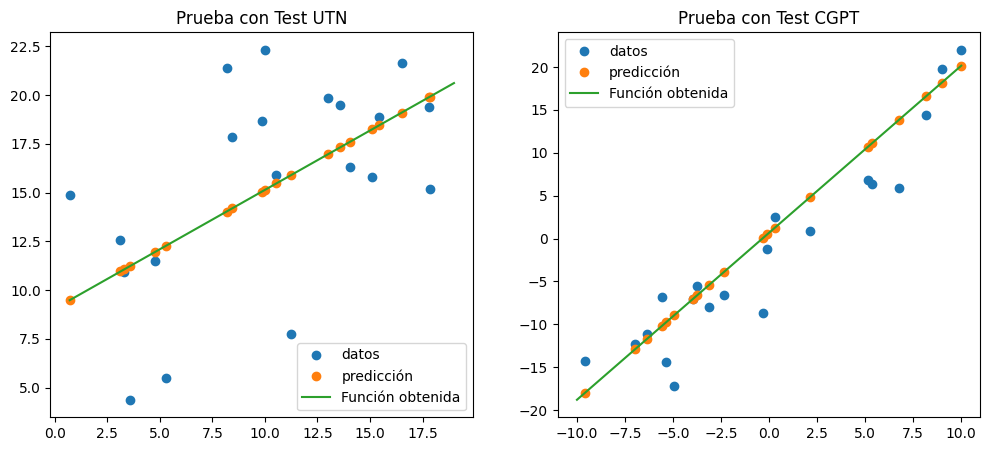

In [6]:
#Prueba con Datos de Validación
#Ahora, probaremos que tan bien funciona con los datos de test.

# Grilla de 2 celdas horizontales
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

y_pred_test_utn = regressor_utn.predict(X_test_utn)
y_pred_test_cgpt = regressor_cgpt.predict(X_test_cgpt)

axes[0].plot(X_test_utn, y_test_utn, 'o', label="datos")
axes[0].plot(X_test_utn, y_pred_test_utn, 'o', label="predicción")
axes[0].plot(xlin_utn, ylin_utn, label='Función obtenida')
axes[0].set_title('Prueba con Test UTN')
axes[0].legend(loc='best');

axes[1].plot(X_test_cgpt, y_test_cgpt, 'o', label="datos")
axes[1].plot(X_test_cgpt, y_pred_test_cgpt, 'o', label="predicción")
axes[1].plot(xlin_cgpt, ylin_cgpt, label='Función obtenida')
axes[1].set_title('Prueba con Test CGPT')
axes[1].legend(loc='best');


In [7]:
regressor_utn.score(X_test_utn, y_test_utn) # Recordemos:cuanto más cercano a uno, mejor

0.29213355123512985

In [8]:
regressor_utn.score(X_test_cgpt, y_test_cgpt) # Recordemos:cuanto más cercano a uno, mejor

-0.4242478321074492

In [9]:

print('UTN - Error Cuadrático Medio (Mean Squared Error): %.8f' % mean_squared_error(y_test_utn, y_pred_test_utn))
print('UTN - ECoeficiente de Determinación (Coefficient of Determination): %.8f' % r2_score(y_test_utn, y_pred_test_utn))
print('')
print('CGPT - Error Cuadrático Medio (Mean Squared Error): %.8f' % mean_squared_error(y_test_cgpt, y_pred_test_cgpt))
print('CGPT - Coeficiente de Determinación (Coefficient of Determination): %.8f' % r2_score(y_test_cgpt, y_pred_test_cgpt))


UTN - Error Cuadrático Medio (Mean Squared Error): 18.60997159
UTN - ECoeficiente de Determinación (Coefficient of Determination): 0.29213355

CGPT - Error Cuadrático Medio (Mean Squared Error): 16.96152386
CGPT - Coeficiente de Determinación (Coefficient of Determination): 0.86120439
